In [1]:
import matplotlib.pyplot as plt
import scipy.io
import helper_functions.helper_functions as helper

# Change this to GPU or CPU depending on your machine
%run fista_spectral_cupy.py GPU

device =  GPU , using GPU and cupy


In [2]:
if device == 'GPU':
    import cupy as np
    np.cuda.Device(2).use()
else:
    import numpy as np

## Load in calibration data and image

In [3]:
loaded_mat = scipy.io.loadmat('SampleData/calibration.mat')
img = plt.imread('SampleData/meas_thordog.png')

In [4]:
mask, psf, img = helper.preprocess(loaded_mat['mask'], loaded_mat['psf'], img)

In [5]:
# Place variables on GPU if using GPU
if device == 'GPU': 
    mask = np.asarray(mask)
    psf = np.asarray(psf)
    img = np.asarray(img)
    

## Setup FISTA Algorithm

In [6]:
fista = fista_spectral_numpy(psf, mask[:,:,0:-1])

In [7]:
fista.iters = 500

# Default: tv, Options: 'native' for native sparsity, 'non-neg' for enforcing non-negativity only
fista.prox_method = 'tv'  
fista.tv_lambda  = .003
fista.tv_lambdaw = 0.01 
fista.lowrank_lambda = 0.00005

iteration:  0  loss:  1310.149210652239


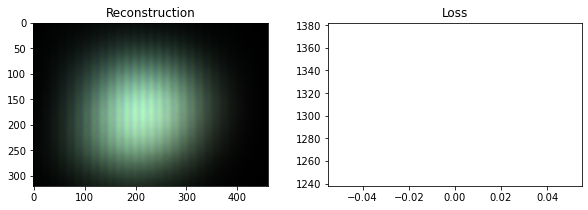

iteration:  20  loss:  118.67611242874175


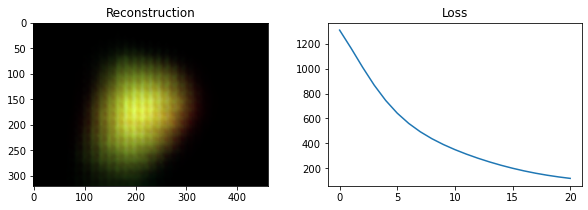

iteration:  40  loss:  38.47145335614469


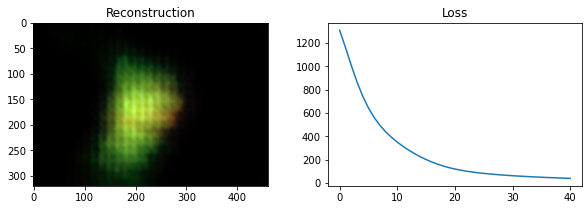

iteration:  60  loss:  20.37078478069985


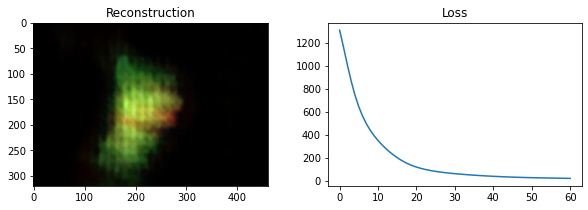

iteration:  80  loss:  13.534314943438323


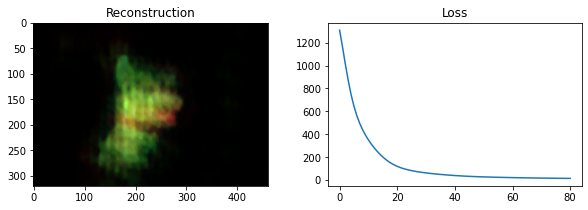

iteration:  100  loss:  10.469084407325292


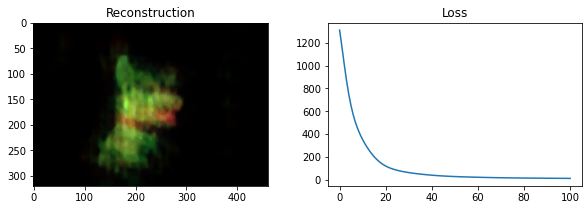

iteration:  120  loss:  9.119691485922337


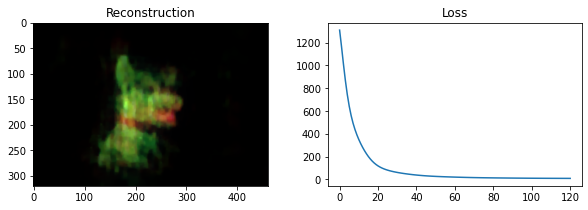

iteration:  140  loss:  8.348514397036576


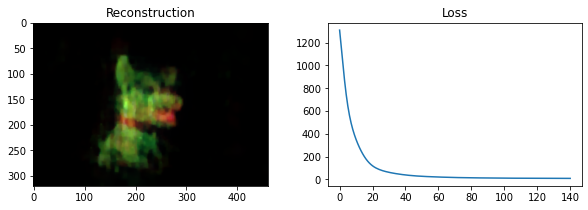

iteration:  160  loss:  7.760140856460749


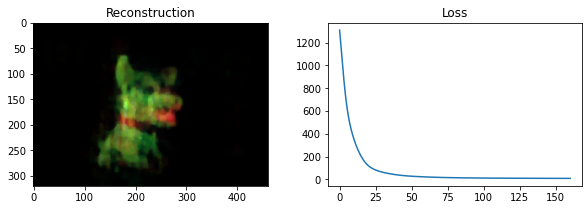

iteration:  180  loss:  7.302716145924632


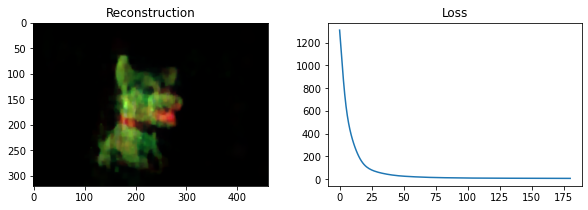

iteration:  200  loss:  6.966299789440718


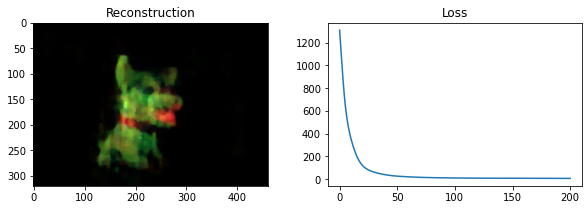

iteration:  220  loss:  6.7273192258888574


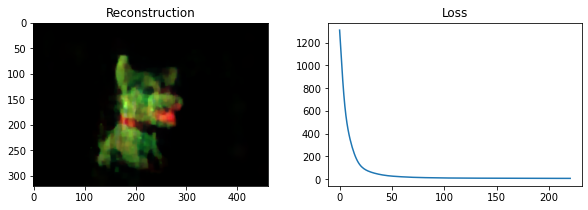

iteration:  240  loss:  6.53301202307326


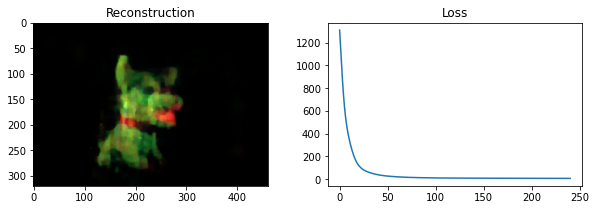

iteration:  260  loss:  6.3658416386485195


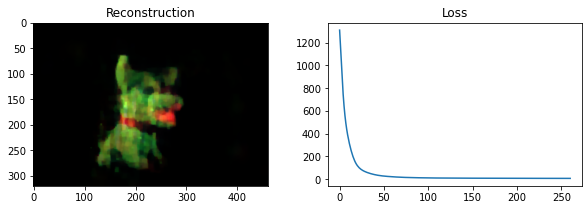

iteration:  280  loss:  6.224319832119829


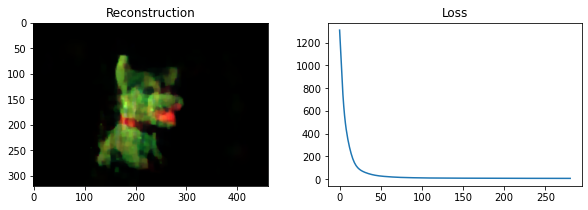

iteration:  300  loss:  6.112272319371023


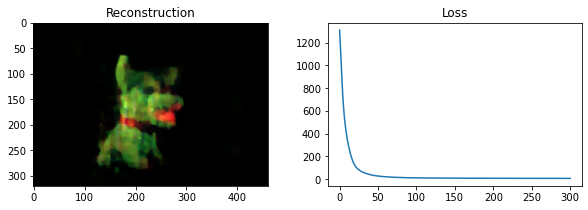

iteration:  320  loss:  6.027507138355055


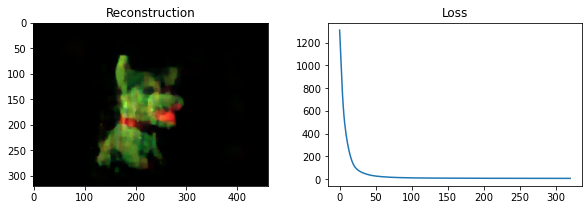

iteration:  340  loss:  5.960653213654994


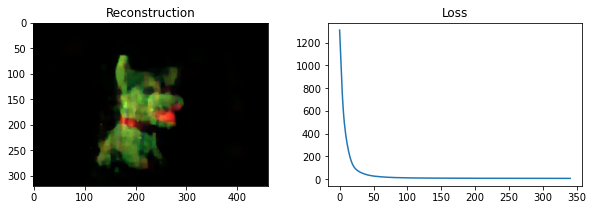

iteration:  360  loss:  5.903362577958905


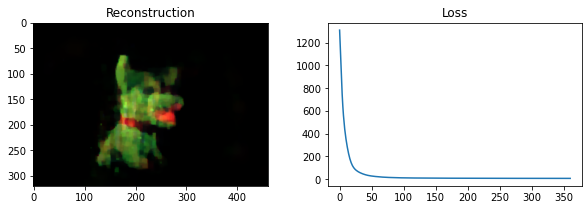

iteration:  380  loss:  5.852807559123385


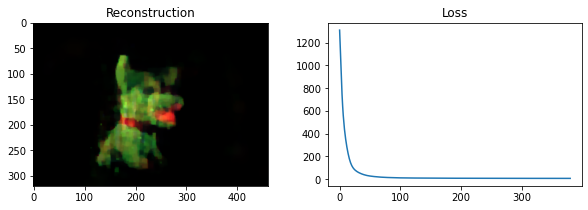

iteration:  400  loss:  5.809511494136097


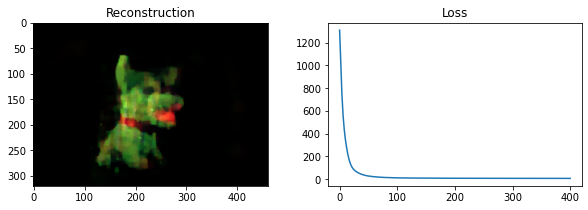

iteration:  420  loss:  5.773387336717086


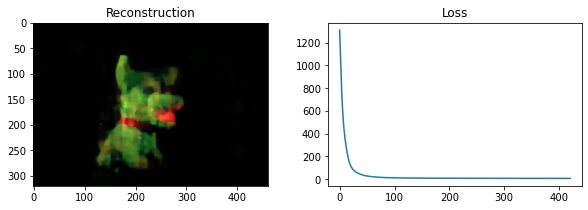

In [ ]:
out_img = fista.run(img)

In [ ]:
out_img = fista.out_img
fc_img = helper.pre_plot(helper.stack_rgb_opt(out_img))


In [ ]:
plt.imshow(fc_img); plt.axis('off');

In [ ]:
helper.plt3D(helper.pre_plot(out_img))